<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [91]:
# insert code here

import scipy
import numpy as np
from keras.models import Sequential
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [92]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [93]:
import matplotlib.pyplot as plt

In [94]:
import seaborn as sns

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [95]:
# insert code here

diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### Prepare input data

In [96]:
# insert code here

diabetes.data.shape

(442, 10)

In [97]:
X = diabetes.data

In [98]:
diabetes.target.shape

(442,)

In [99]:
y = diabetes.target

### Split the data (training/test)

In [100]:
# insert code here

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)

In [101]:
X_train.shape


(353, 10)

In [102]:
y_train = y_train.reshape(-1,1)
y_train.shape

(353, 1)

In [103]:
X_test.shape

(89, 10)

In [104]:
y_test = y_test.reshape(-1,1)
y_test.shape

(89, 1)

In [105]:
y_test

array([[155.],
       [168.],
       [115.],
       [233.],
       [190.],
       [202.],
       [ 59.],
       [101.],
       [118.],
       [244.],
       [252.],
       [148.],
       [232.],
       [ 72.],
       [107.],
       [ 71.],
       [191.],
       [ 65.],
       [245.],
       [ 85.],
       [185.],
       [ 84.],
       [ 78.],
       [268.],
       [248.],
       [178.],
       [196.],
       [248.],
       [144.],
       [ 83.],
       [275.],
       [ 39.],
       [113.],
       [ 64.],
       [232.],
       [200.],
       [200.],
       [122.],
       [163.],
       [180.],
       [135.],
       [164.],
       [156.],
       [126.],
       [ 68.],
       [306.],
       [ 83.],
       [ 45.],
       [ 91.],
       [ 25.],
       [270.],
       [178.],
       [108.],
       [ 86.],
       [160.],
       [196.],
       [248.],
       [139.],
       [155.],
       [150.],
       [ 74.],
       [ 89.],
       [216.],
       [ 65.],
       [242.],
       [136.],
       [18

In [106]:
# Standard scale Xs and ys


scalerX = StandardScaler()
scalery = StandardScaler()

scaled_X_train = scalerX.fit_transform(X_train)
scaled_y_train = scalery.fit_transform(y_train)
scaled_X_test = scalerX.transform(X_test)
scaled_y_test = scalery.transform(y_test)

### Create the model's architecture

In [107]:

# Set up the model architecture
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))


In [108]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [109]:

# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

### Fit the training data

In [110]:
%%time


# fit the keras model on the dataset
history = model.fit(scaled_X_train, scaled_y_train, epochs=300, batch_size=10, validation_split = 0.2 )

Epoch 1/300
29/29 [==============================] - 0s 4ms/step - loss: 1.5847 - mse: 1.5847 - mae: 1.0794 - val_loss: 1.0002 - val_mse: 1.0002 - val_mae: 0.7993
Epoch 2/300
29/29 [==============================] - 0s 820us/step - loss: 1.1869 - mse: 1.1869 - mae: 0.9342 - val_loss: 0.7892 - val_mse: 0.7892 - val_mae: 0.7166
Epoch 3/300
29/29 [==============================] - 0s 1ms/step - loss: 0.9617 - mse: 0.9617 - mae: 0.8387 - val_loss: 0.6877 - val_mse: 0.6877 - val_mae: 0.6687
Epoch 4/300
29/29 [==============================] - 0s 1ms/step - loss: 0.8291 - mse: 0.8291 - mae: 0.7703 - val_loss: 0.6174 - val_mse: 0.6174 - val_mae: 0.6336
Epoch 5/300
29/29 [==============================] - 0s 1ms/step - loss: 0.7292 - mse: 0.7292 - mae: 0.7149 - val_loss: 0.5742 - val_mse: 0.5742 - val_mae: 0.6165
Epoch 6/300
29/29 [==============================] - 0s 1ms/step - loss: 0.6639 - mse: 0.6639 - mae: 0.6741 - val_loss: 0.5465 - val_mse: 0.5465 - val_mae: 0.6028
Epoch 7/300
29/29 [=

Epoch 51/300
29/29 [==============================] - 0s 1ms/step - loss: 0.3954 - mse: 0.3954 - mae: 0.5017 - val_loss: 0.5344 - val_mse: 0.5344 - val_mae: 0.5826
Epoch 52/300
29/29 [==============================] - 0s 1ms/step - loss: 0.3989 - mse: 0.3989 - mae: 0.5065 - val_loss: 0.5235 - val_mse: 0.5235 - val_mae: 0.5802
Epoch 53/300
29/29 [==============================] - 0s 997us/step - loss: 0.3943 - mse: 0.3943 - mae: 0.5016 - val_loss: 0.5351 - val_mse: 0.5351 - val_mae: 0.5855
Epoch 54/300
29/29 [==============================] - 0s 984us/step - loss: 0.3926 - mse: 0.3926 - mae: 0.5005 - val_loss: 0.5345 - val_mse: 0.5345 - val_mae: 0.5815
Epoch 55/300
29/29 [==============================] - 0s 1ms/step - loss: 0.3901 - mse: 0.3901 - mae: 0.4988 - val_loss: 0.5314 - val_mse: 0.5314 - val_mae: 0.5835
Epoch 56/300
29/29 [==============================] - 0s 1ms/step - loss: 0.3911 - mse: 0.3911 - mae: 0.5015 - val_loss: 0.5303 - val_mse: 0.5303 - val_mae: 0.5808
Epoch 57/300

Epoch 101/300
29/29 [==============================] - 0s 978us/step - loss: 0.3396 - mse: 0.3396 - mae: 0.4634 - val_loss: 0.5472 - val_mse: 0.5472 - val_mae: 0.5862
Epoch 102/300
29/29 [==============================] - 0s 1ms/step - loss: 0.3348 - mse: 0.3348 - mae: 0.4600 - val_loss: 0.5455 - val_mse: 0.5455 - val_mae: 0.5843
Epoch 103/300
29/29 [==============================] - 0s 1ms/step - loss: 0.3331 - mse: 0.3331 - mae: 0.4590 - val_loss: 0.5530 - val_mse: 0.5530 - val_mae: 0.5863
Epoch 104/300
29/29 [==============================] - 0s 1ms/step - loss: 0.3324 - mse: 0.3324 - mae: 0.4562 - val_loss: 0.5608 - val_mse: 0.5608 - val_mae: 0.5915
Epoch 105/300
29/29 [==============================] - 0s 1ms/step - loss: 0.3344 - mse: 0.3344 - mae: 0.4576 - val_loss: 0.5523 - val_mse: 0.5523 - val_mae: 0.5872
Epoch 106/300
29/29 [==============================] - 0s 1ms/step - loss: 0.3313 - mse: 0.3313 - mae: 0.4560 - val_loss: 0.5608 - val_mse: 0.5608 - val_mae: 0.5921
Epoch 10

29/29 [==============================] - 0s 1ms/step - loss: 0.2909 - mse: 0.2909 - mae: 0.4181 - val_loss: 0.5631 - val_mse: 0.5631 - val_mae: 0.5843
Epoch 151/300
29/29 [==============================] - 0s 1ms/step - loss: 0.2920 - mse: 0.2920 - mae: 0.4225 - val_loss: 0.5461 - val_mse: 0.5461 - val_mae: 0.5737
Epoch 152/300
29/29 [==============================] - 0s 1ms/step - loss: 0.2863 - mse: 0.2863 - mae: 0.4188 - val_loss: 0.5569 - val_mse: 0.5569 - val_mae: 0.5874
Epoch 153/300
29/29 [==============================] - 0s 1ms/step - loss: 0.2869 - mse: 0.2869 - mae: 0.4194 - val_loss: 0.5460 - val_mse: 0.5460 - val_mae: 0.5778
Epoch 154/300
29/29 [==============================] - 0s 1ms/step - loss: 0.2831 - mse: 0.2831 - mae: 0.4166 - val_loss: 0.5496 - val_mse: 0.5496 - val_mae: 0.5813
Epoch 155/300
29/29 [==============================] - 0s 1ms/step - loss: 0.2825 - mse: 0.2825 - mae: 0.4166 - val_loss: 0.5712 - val_mse: 0.5712 - val_mae: 0.5899
Epoch 156/300
29/29 [===

29/29 [==============================] - 0s 1ms/step - loss: 0.2430 - mse: 0.2430 - mae: 0.3823 - val_loss: 0.5816 - val_mse: 0.5816 - val_mae: 0.5908
Epoch 200/300
29/29 [==============================] - 0s 963us/step - loss: 0.2432 - mse: 0.2432 - mae: 0.3820 - val_loss: 0.5885 - val_mse: 0.5885 - val_mae: 0.5936
Epoch 201/300
29/29 [==============================] - 0s 1ms/step - loss: 0.2426 - mse: 0.2426 - mae: 0.3778 - val_loss: 0.5935 - val_mse: 0.5935 - val_mae: 0.5973
Epoch 202/300
29/29 [==============================] - 0s 1ms/step - loss: 0.2430 - mse: 0.2430 - mae: 0.3820 - val_loss: 0.5930 - val_mse: 0.5930 - val_mae: 0.5954
Epoch 203/300
29/29 [==============================] - 0s 1ms/step - loss: 0.2427 - mse: 0.2427 - mae: 0.3812 - val_loss: 0.5939 - val_mse: 0.5939 - val_mae: 0.5951
Epoch 204/300
29/29 [==============================] - 0s 1ms/step - loss: 0.2408 - mse: 0.2408 - mae: 0.3783 - val_loss: 0.6044 - val_mse: 0.6044 - val_mae: 0.6023
Epoch 205/300
29/29 [=

29/29 [==============================] - 0s 1ms/step - loss: 0.2167 - mse: 0.2167 - mae: 0.3563 - val_loss: 0.6563 - val_mse: 0.6563 - val_mae: 0.6214
Epoch 249/300
29/29 [==============================] - 0s 1ms/step - loss: 0.2156 - mse: 0.2156 - mae: 0.3563 - val_loss: 0.6535 - val_mse: 0.6535 - val_mae: 0.6214
Epoch 250/300
29/29 [==============================] - 0s 1ms/step - loss: 0.2163 - mse: 0.2163 - mae: 0.3534 - val_loss: 0.6551 - val_mse: 0.6551 - val_mae: 0.6232
Epoch 251/300
29/29 [==============================] - 0s 1ms/step - loss: 0.2150 - mse: 0.2150 - mae: 0.3557 - val_loss: 0.6561 - val_mse: 0.6561 - val_mae: 0.6211
Epoch 252/300
29/29 [==============================] - 0s 1ms/step - loss: 0.2127 - mse: 0.2127 - mae: 0.3539 - val_loss: 0.6546 - val_mse: 0.6546 - val_mae: 0.6214
Epoch 253/300
29/29 [==============================] - 0s 1ms/step - loss: 0.2111 - mse: 0.2111 - mae: 0.3526 - val_loss: 0.6539 - val_mse: 0.6539 - val_mae: 0.6219
Epoch 254/300
29/29 [===

Epoch 298/300
29/29 [==============================] - 0s 1ms/step - loss: 0.1901 - mse: 0.1901 - mae: 0.3338 - val_loss: 0.7053 - val_mse: 0.7053 - val_mae: 0.6519
Epoch 299/300
29/29 [==============================] - 0s 1ms/step - loss: 0.1908 - mse: 0.1908 - mae: 0.3392 - val_loss: 0.7109 - val_mse: 0.7109 - val_mae: 0.6529
Epoch 300/300
29/29 [==============================] - 0s 1ms/step - loss: 0.1886 - mse: 0.1886 - mae: 0.3334 - val_loss: 0.7043 - val_mse: 0.7043 - val_mae: 0.6522
Wall time: 11.1 s


### Create predictions

In [111]:
# y_train predications

y_train_pred = scalery.inverse_transform(model.predict(scaled_X_train))
y_train_pred

array([[204.32597 ],
       [126.93522 ],
       [106.32449 ],
       [110.83504 ],
       [295.41776 ],
       [238.45526 ],
       [172.33452 ],
       [117.627174],
       [123.883606],
       [102.36363 ],
       [155.333   ],
       [258.55267 ],
       [147.92975 ],
       [104.84903 ],
       [181.52219 ],
       [ 96.345024],
       [ 97.00416 ],
       [122.91434 ],
       [ 92.69113 ],
       [106.30688 ],
       [ 99.195206],
       [ 92.9836  ],
       [174.04471 ],
       [242.92351 ],
       [ 78.4245  ],
       [297.85974 ],
       [180.24419 ],
       [106.09898 ],
       [107.536545],
       [122.188675],
       [205.53947 ],
       [243.75136 ],
       [239.78284 ],
       [106.68906 ],
       [ 86.23331 ],
       [ 88.46353 ],
       [102.90597 ],
       [203.05502 ],
       [ 69.479195],
       [274.3663  ],
       [ 99.18743 ],
       [263.26523 ],
       [252.8032  ],
       [208.78093 ],
       [241.25816 ],
       [253.02077 ],
       [113.64076 ],
       [141.6

In [112]:
# y_test predications

y_test_pred = scalery.inverse_transform(model.predict(scaled_X_test))
y_test_pred

array([[312.33014 ],
       [195.2     ],
       [101.751595],
       [398.90356 ],
       [160.15993 ],
       [ 72.98355 ],
       [138.90225 ],
       [ 51.35157 ],
       [109.343414],
       [199.86569 ],
       [266.69666 ],
       [115.59647 ],
       [244.06476 ],
       [ 55.908417],
       [113.20962 ],
       [124.97614 ],
       [137.63144 ],
       [ 89.302185],
       [141.1024  ],
       [ 59.568268],
       [158.44482 ],
       [ 89.86133 ],
       [ 67.94342 ],
       [347.90384 ],
       [244.96457 ],
       [ 98.888016],
       [152.28046 ],
       [170.22311 ],
       [ 60.465668],
       [ 88.55088 ],
       [282.56058 ],
       [ 60.957695],
       [ 80.96466 ],
       [113.91135 ],
       [252.69247 ],
       [164.30359 ],
       [194.73491 ],
       [183.86494 ],
       [247.31863 ],
       [336.36823 ],
       [195.00375 ],
       [202.53331 ],
       [127.66278 ],
       [ 89.8673  ],
       [ 98.73553 ],
       [221.31947 ],
       [319.4811  ],
       [ 39.9

### Evaluate the model

In [113]:
# evaluate the keras model on train data
loss, mse, ame = model.evaluate(scaled_X_train, scaled_y_train)
print('loss', loss, '\n mse', mse, '\n ame',ame)

12/12 [==============================] - 0s 914us/step - loss: 0.2877 - mse: 0.2877 - mae: 0.3938
loss 0.28765323758125305 
 mse 0.28765323758125305 
 ame 0.3937597870826721


In [114]:
# evaluate the keras model on test data
loss, mse, ame = model.evaluate(scaled_X_test, scaled_y_test)
print('loss', loss, '\n mse', mse, '\n ame',ame)

3/3 [==============================] - 0s 998us/step - loss: 0.8332 - mse: 0.8332 - mae: 0.6722
loss 0.8332224488258362 
 mse 0.8332224488258362 
 ame 0.6722317337989807


### Visualisation of cost

In [22]:
# insert code here

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


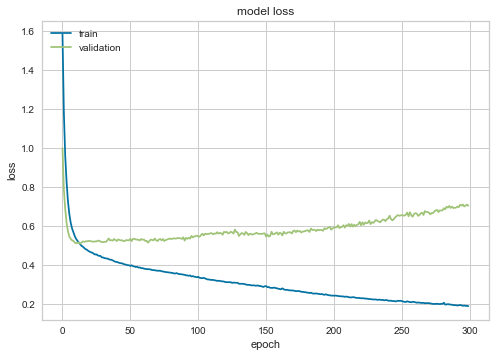

In [115]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Visualisation of residuals

C:\Users\dmuwa\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


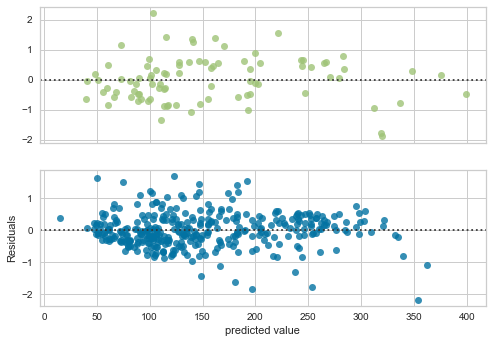

In [116]:
f, (ax1, ax2) = plt.subplots(2, sharex=True)
sns.residplot(y_test_pred, scaled_y_test,  ax=ax1, color = 'g')
sns.residplot(y_train_pred, scaled_y_train,  ax=ax2)
plt.xlabel('predicted value')
plt.ylabel('Residuals')
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



